# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [3]:
from sklearn.datasets import load_wine

wine = load_wine()

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
X = wine.data
y = wine.target

In [5]:
kmeans = KMeans(n_clusters = 8).fit(X)

# The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. Negative values generally indicate 
# that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

print('Silhouette score 8 clusters | KMeans: ', silhouette_score(X, kmeans.labels_))

Silhouette score 8 clusters | KMeans:  0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters = 5).fit(X)

# The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. Negative values generally indicate 
# that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

print('Silhouette score 5 clusters | KMeans: ', silhouette_score(X, kmeans.labels_))

Silhouette score 5 clusters | KMeans:  0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
kmeans = KMeans(n_clusters = 3).fit(X)

# The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. Negative values generally indicate 
# that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

print('Silhouette score 3 clusters | KMeans: ', silhouette_score(X, kmeans.labels_))

Silhouette score 3 clusters | KMeans:  0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

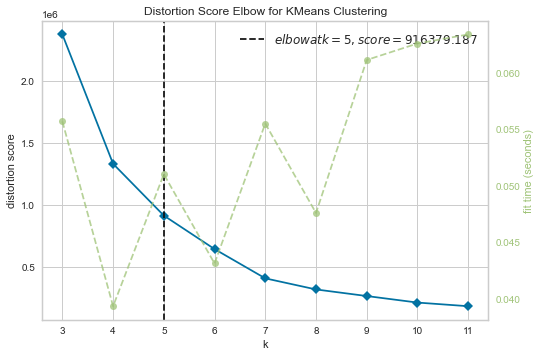

In [8]:
visualizer = KElbowVisualizer(kmeans, k=(3,12), metric = 'distortion')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

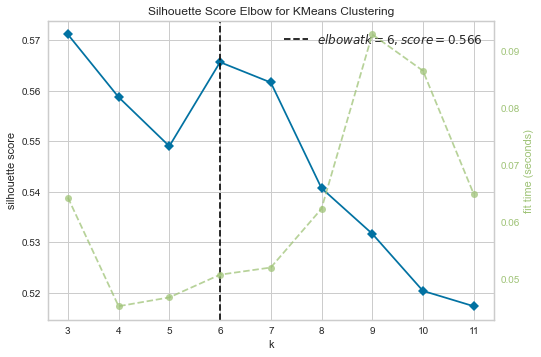

In [9]:
visualizer = KElbowVisualizer(kmeans, k=(3,12), metric = 'silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

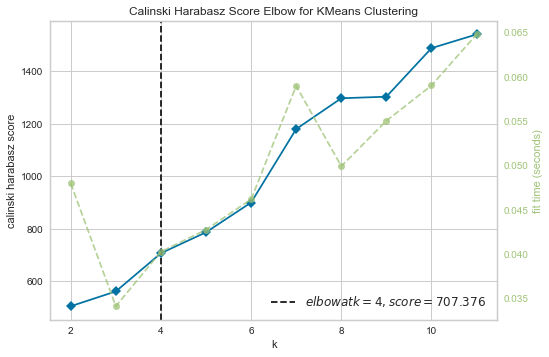

In [10]:
visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)       
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [11]:
agglo = AgglomerativeClustering()

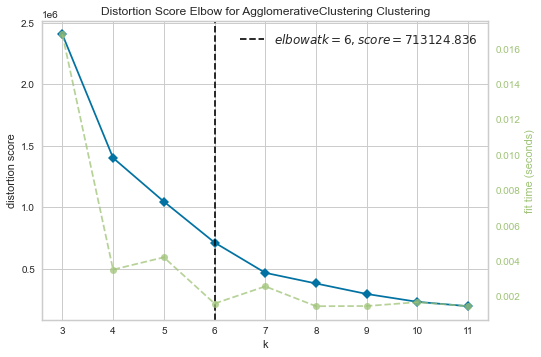

In [12]:
visualizer = KElbowVisualizer(agglo, k=(3,12), metric = 'distortion')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

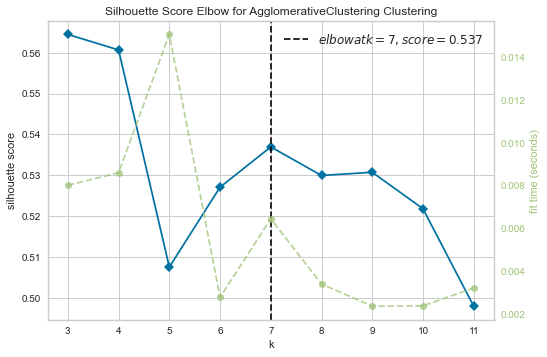

In [13]:
visualizer = KElbowVisualizer(agglo, k=(3,12), metric = 'silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

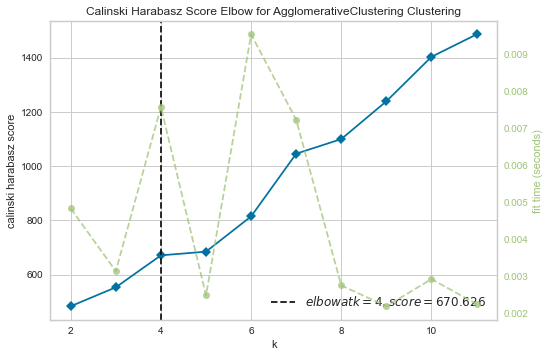

In [14]:
visualizer = KElbowVisualizer(agglo, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)       
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [15]:
# best results with K-Means with number of clusters = 3

In [16]:
X = pd.DataFrame(wine.data, columns = wine.feature_names)
kmeans = KMeans(3).fit(X)

In [17]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = kmeans.labels_

In [18]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


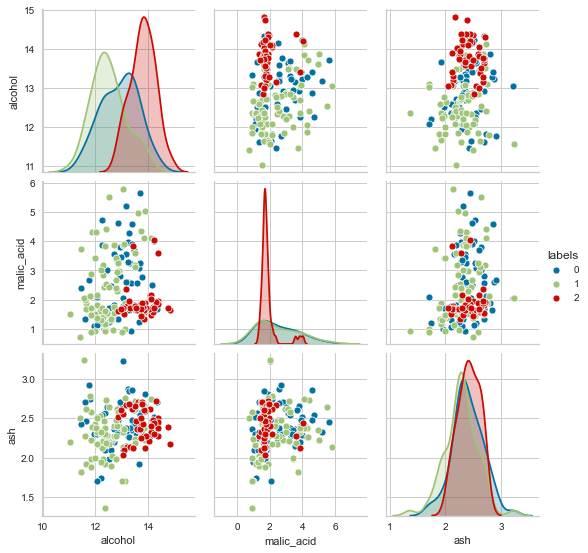

In [19]:
#Primer bin
sns.pairplot(X[bin1], hue='labels')

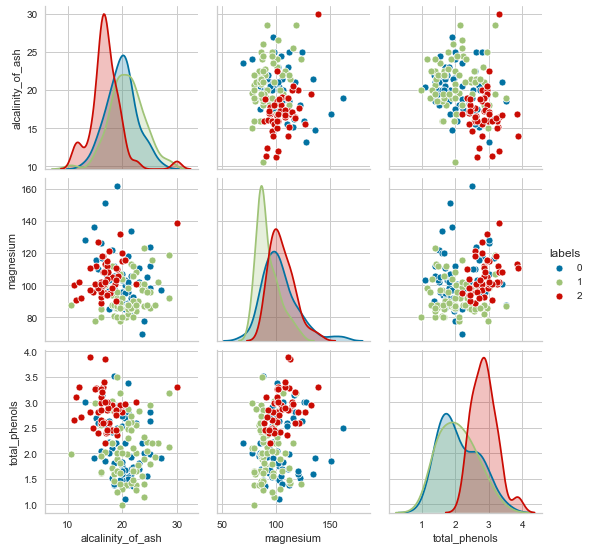

In [20]:
#Segundo bin
sns.pairplot(X[bin2], hue='labels')

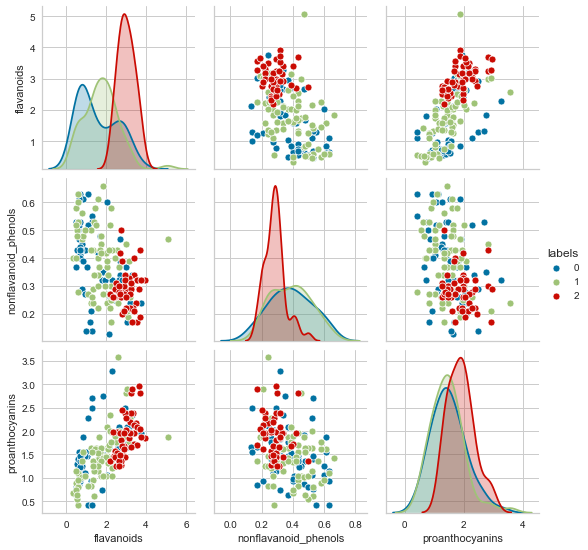

In [21]:
#Tercer bin
sns.pairplot(X[bin3], hue='labels')

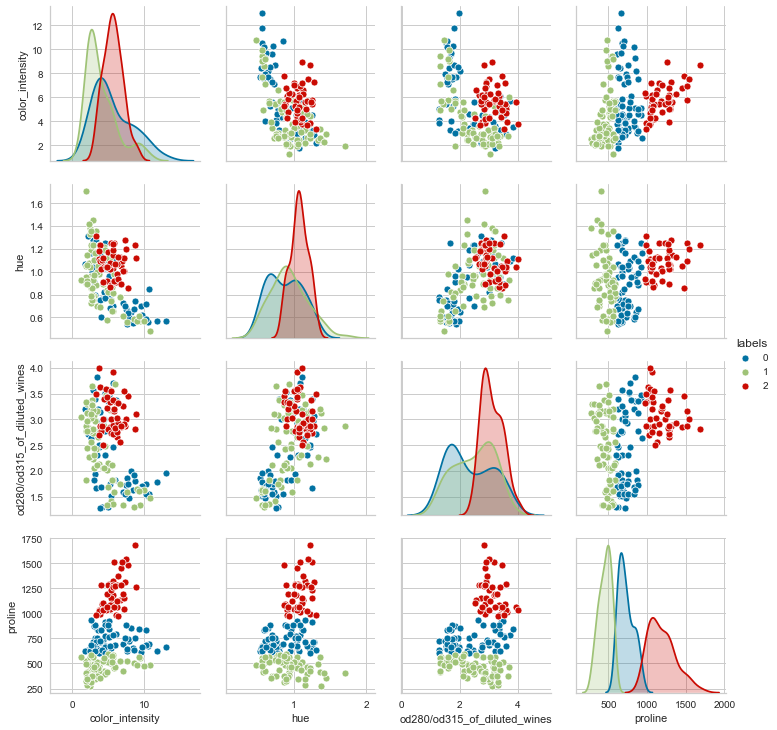

In [22]:
#Cuarto bin
sns.pairplot(X[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [23]:
X_train_scaled = StandardScaler().fit_transform(X)

In [24]:
pca = PCA(n_components = 2)
pca = pca.fit_transform(X_train_scaled)

In [25]:
pca_df = pd.DataFrame(data=pca, columns = ['PC1', 'PC2'])

In [26]:
pca_df['labels'] = wine.target

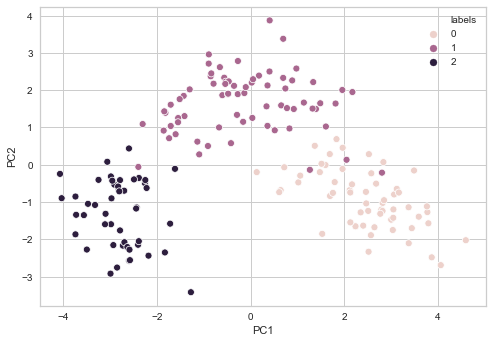

In [27]:
sns.scatterplot(x='PC1',y='PC2',data = pca_df, hue = pca_df['labels'])